# 案例二：泰坦尼克号沉没数据集

In [1]:
# 导入需要用的包
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# 读取数据集
data = pd.read_csv('data.csv', header=0, index_col=0)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


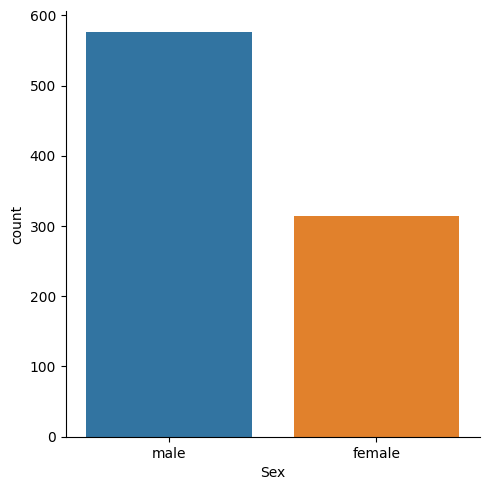

In [3]:
# 可视化分析
# 性别与生存的关系
sns.catplot(x='Sex', data=data, kind='count')

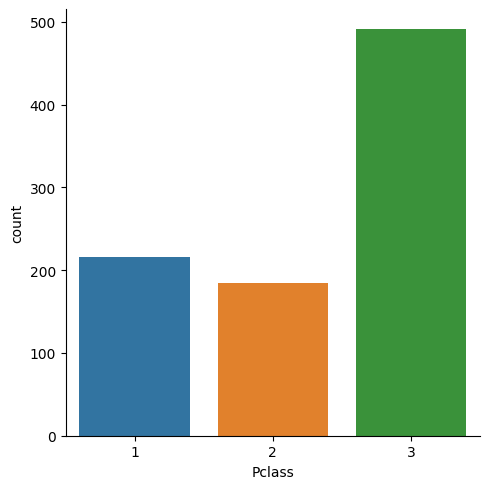

In [4]:
# 乘客等级与生存的关系
sns.catplot(x='Pclass', data=data, kind='count')

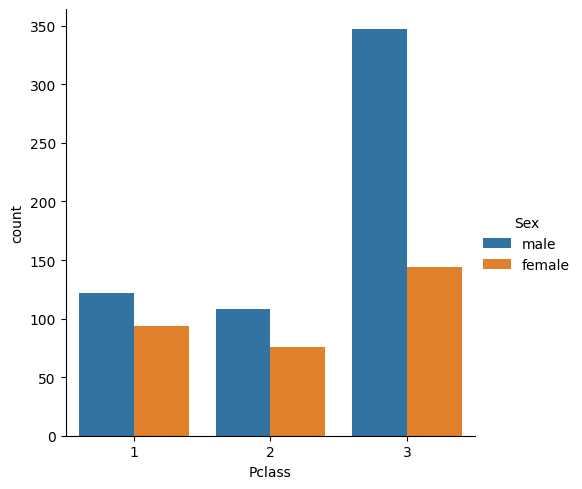

In [5]:
# 按性别分组，查看各个等级的生存情况
sns.catplot(x='Pclass', data=data, kind='count', hue='Sex')

C:\Users\86151\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\86151\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\86151\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


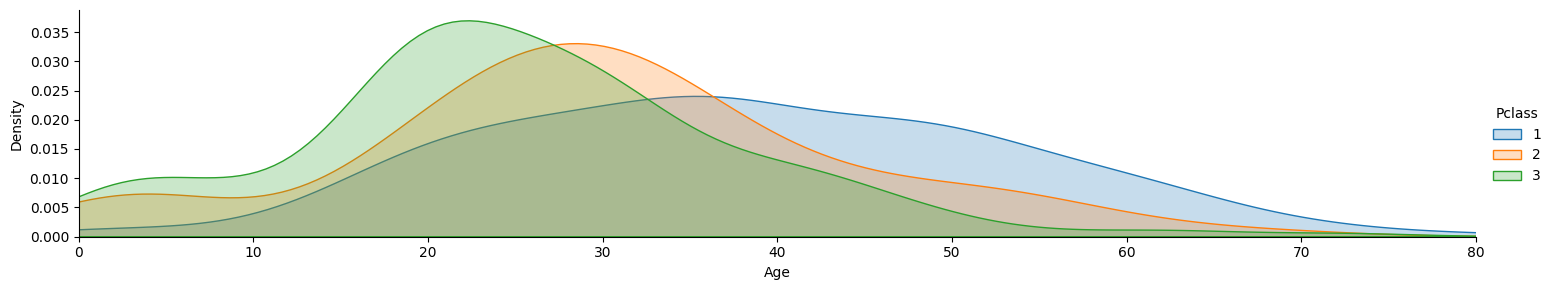

In [6]:
as_fig = sns.FacetGrid(data, hue='Pclass', aspect=5)
as_fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
as_fig.set(xlim=(0, oldest))
as_fig.add_legend()

上面图过多反映了财富与年龄的关系，越老的人越有钱

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 数据预处理

数据预处理，删除一些列 <br>
名字(Name)对于生存应该没有影响，且没有合适的方式来度量这一变量 <br>
船舱(Cabin)应该删除，因为缺失值过多，其实我个人认为某些情况下船舱客观上对生存的影响还是蛮大的，比如离甲板越近意味着逃生越快 <br>
船票(Ticket)删除，没什么影响

In [9]:
# 删除列
# 删除缺失值过多的列
# 删除与预测无关的列
data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# 如果没有选择inplace=True，那么原数据集不会被改变，需要重新赋值
# data = data.drop(['Cabin', 'Name', 'Ticket'], axis=1)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


缺失值的处理 <br>
* 如果缺失值太多，直接删除整行
* 如果缺失值不断，进行填补

In [10]:
# 缺失值的处理
# 查看缺失值
data['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
# 使用均值填补缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
# 查看数据
data.info()

# 或者
# data['Age']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


Embarked中缺失值，只有几行，但是不太好填补处理，因此直接用`dropna()`删除

In [13]:
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# 探索性分析

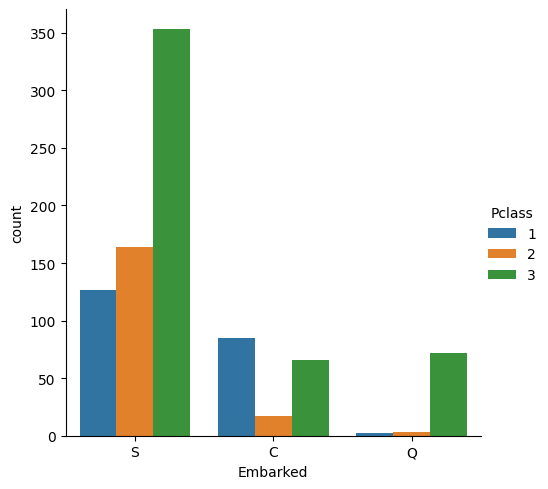

In [14]:
sns.catplot(x='Embarked', data=data, kind='count', hue='Pclass')

In [15]:
# 构建变量显示是否和家人一起登船
data['Alone'] = data['SibSp'] + data['Parch']

data.head()

C:\Users\86151\AppData\Local\Temp\ipykernel_19444\1278067275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Alone'] = data['SibSp'] + data['Parch']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


In [16]:
# 修改Alone列的值
data.loc[data['Alone'] > 0, "Alone"] = 'With Family'
data.loc[data['Alone'] == 0, "Alone"] = 'Without Family'
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,With Family
2,1,1,female,38.0,1,0,71.2833,C,With Family
3,1,3,female,26.0,0,0,7.9250,S,Without Family
4,1,1,female,35.0,1,0,53.1000,S,With Family
5,0,3,male,35.0,0,0,8.0500,S,Without Family


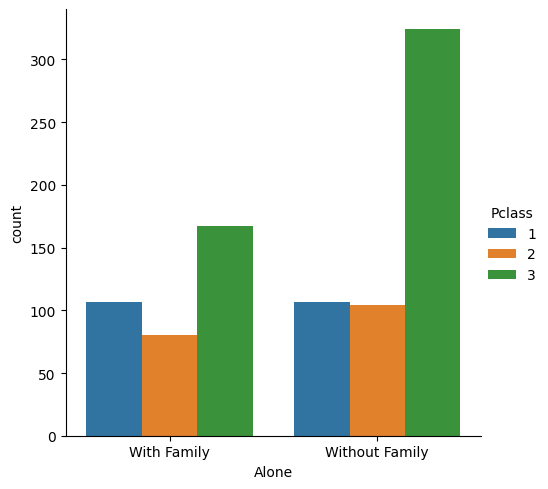

In [17]:
sns.catplot(x='Alone', data=data, kind='count', hue='Pclass')

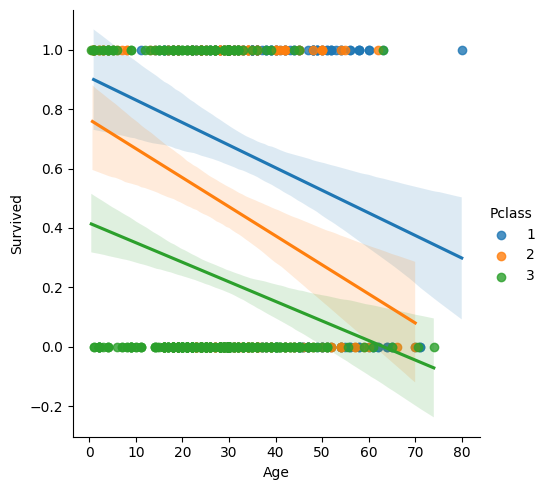

In [18]:
sns.lmplot(data, x="Age", y="Survived", hue="Pclass")

# 数据类型转换

将非数值类型的数据转换为数值类型的数据。

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,With Family
2,1,1,female,38.0,1,0,71.2833,C,With Family
3,1,3,female,26.0,0,0,7.9250,S,Without Family
4,1,1,female,35.0,1,0,53.1000,S,With Family
5,0,3,male,35.0,0,0,8.0500,S,Without Family


使用`astype()`将Sex变量强行转换

In [20]:
data['Sex'] = (data['Sex']=='male').astype(int)
data['Alone'] = (data['Alone']=='With Family').astype(int)

data.head()

C:\Users\86151\AppData\Local\Temp\ipykernel_19444\2053144364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex']=='male').astype(int)
C:\Users\86151\AppData\Local\Temp\ipykernel_19444\2053144364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Alone'] = (data['Alone']=='With Family').astype(int)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,1
2,1,1,0,38.0,1,0,71.2833,C,1
3,1,3,0,26.0,0,0,7.9250,S,0
4,1,1,0,35.0,1,0,53.1000,S,1
5,0,3,1,35.0,0,0,8.0500,S,0


In [21]:
# 查看多分类变量
labels = data['Embarked'].unique().tolist()
print(labels)
labels.index('S')

['S', 'C', 'Q']


0

In [22]:
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

data.head()

C:\Users\86151\AppData\Local\Temp\ipykernel_19444\1495911236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,1
2,1,1,0,38.0,1,0,71.2833,1,1
3,1,3,0,26.0,0,0,7.9250,0,0
4,1,1,0,35.0,1,0,53.1000,0,1
5,0,3,1,35.0,0,0,8.0500,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
 8   Alone     889 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 62.5 KB


In [24]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,1
2,1,1,0,38.000000,1,0,71.2833,1,1
3,1,3,0,26.000000,0,0,7.9250,0,0
4,1,1,0,35.000000,1,0,53.1000,0,1
5,0,3,1,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0,0
888,1,1,0,19.000000,0,0,30.0000,0,0
889,0,3,0,29.699118,1,2,23.4500,0,1


In [25]:
data.iloc[1, :]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Embarked     1.0000
Alone        1.0000
Name: 2, dtype: float64

# 准备建立模型

In [26]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,
1,3,1,22.000000,1,0,7.2500,0,1
2,1,0,38.000000,1,0,71.2833,1,1
3,3,0,26.000000,0,0,7.9250,0,0
4,1,0,35.000000,1,0,53.1000,0,1
5,3,1,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,0,0
888,1,0,19.000000,0,0,30.0000,0,0
889,3,0,29.699118,1,2,23.4500,0,1


In [28]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: int64

In [29]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
PassengerId,,,,,,,,
542,3,0,9.000000,4,2,31.2750,0,1
758,2,1,18.000000,0,0,11.5000,0,0
175,1,1,56.000000,0,0,30.6958,1,0
430,3,1,32.000000,0,0,8.0500,0,0
882,3,1,33.000000,0,0,7.8958,0,0
...,...,...,...,...,...,...,...,...
117,3,1,70.500000,0,0,7.7500,2,0
152,1,0,22.000000,1,0,66.6000,0,1
241,3,0,29.699118,1,0,14.4542,1,1


In [30]:
# 恢复索引
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])
    
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,3,0,9.000000,4,2,31.2750,0,1
1,2,1,18.000000,0,0,11.5000,0,0
2,1,1,56.000000,0,0,30.6958,1,0
3,3,1,32.000000,0,0,8.0500,0,0
4,3,1,33.000000,0,0,7.8958,0,0
...,...,...,...,...,...,...,...,...
617,3,1,70.500000,0,0,7.7500,2,0
618,1,0,22.000000,1,0,66.6000,0,1
619,3,0,29.699118,1,0,14.4542,1,1
620,3,1,21.000000,0,0,8.0500,0,0


In [31]:
clf = DecisionTreeClassifier(random_state=888)
clf.fit(X_train, y_train)
socre = clf.score(X_test, y_test)
socre

0.8014981273408239

In [32]:
score = cross_val_score(clf, X, y, cv=10)
score.mean()

0.7705822267620019

## 针对单一参数调参

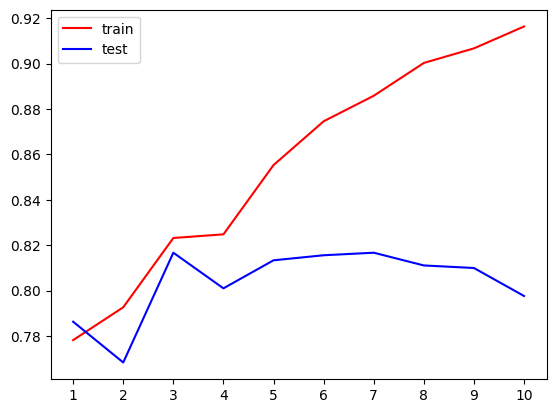

In [33]:
# 针对单一参数进行调参
# 绘制学习曲线
tr = []  # 模型在训练集上的表现
te = []  # 模型在测试集上的表现

for i in range(10):
    clf = DecisionTreeClassifier(random_state=888, 
                                 max_depth=i+1,
                                 criterion='entropy')
    clf.fit(X_train, y_train)
    score_tr = clf.score(X_train, y_train)
    score_te = cross_val_score(clf, X, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
plt.figure()
plt.plot(range(1, 11), tr, color='r', label='train')
plt.plot(range(1, 11), te, color='b', label='test')
plt.xticks(range(1, 11))
plt.legend()

## 网格搜索调参过程

In [ ]:
# 网格搜索
clf = DecisionTreeClassifier(random_state=888)

# 设定参数
parameters = {'criterion':('gini', 'entropy'),
              'splitter':('best', 'random'),
              'max_depth':[*range(1, 10)],
              'min_samples_leaf':[*range(1, 50, 5)],
              'min_impurity_decrease':[*np.linspace(0, 0.5, 20)]}

# 传入参数
GS = GridSearchCV(clf, param_grid=parameters, cv=10)

# 拟合模型
GS.fit(X_train, y_train)

In [47]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [48]:
GS.best_score_

0.823195084485407

In [49]:
GS.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [50]:
GS.score(X_test, y_test)

0.8127340823970037